# Axisymmetric Elastic Solver
## Introduction
This notebook shows the element derivation and implementation of a simple linear solver for two-dimensional axisymmetric structural analyses. I've mainly done this to improve my own understanding of the finite element method, but it may be useful for others!

# Equations: Cylindrical coordinates
The three-dimensional elasticity equations in cylindrical coordinates are as follows:
\begin{equation*}
\frac{\partial\sigma_r}{\partial r} + \frac{1}{r} \frac{\partial\tau_{r\theta}}{\partial \theta} + \frac{\partial\tau_{rz}}{\partial z} + \frac{\sigma_r - \sigma_\theta}{r} + X_r = 0\\
\frac{\partial\tau_{r\theta}}{\partial r} + \frac{1}{r} \frac{\partial\sigma_\theta}{\partial \theta} + \frac{\partial\tau_{\theta z}}{\partial z} + \frac{2}{r} \tau_{r\theta} + Y_\theta = 0\\
\frac{\partial\tau_{rz}}{\partial r} + \frac{1}{r} \frac{\partial\tau_{\theta z}}{\partial \theta} + \frac{\partial\sigma_z}{\partial z} + \frac{1}{r}\tau_{rz} + Z_b = 0\\
\end{equation*}
The three-dimensional strain-displacement relationships of elasticity in cylindrical coordinates are:
\begin{equation*}
\epsilon_r = \frac{\partial u}{\partial r} ,\quad 
\epsilon_\theta = \frac{1}{r} \frac{\partial v}{\partial \theta} + \frac{u}{r} ,\quad
\epsilon_z = \frac{\partial w}{\partial z} \\
\gamma_{r\theta} = \frac{1}{r} \frac{\partial u}{\partial \theta} + \frac{\partial v}{\partial r} - \frac{v}{r} ,\quad  
\gamma_{rz} = \frac{\partial w}{\partial r} + \frac{\partial u}{\partial z} ,\quad
\gamma_{\theta z} = \frac{\partial v}{\partial z} + \frac{1}{r} \frac{\partial w}{\partial \theta}
\end{equation*}
The three-dimensional stress-strain relationships for isotropic elasticity are:
\begin{equation*}
\begin{bmatrix} \sigma_r\\ \sigma_{\theta} \\ \sigma_z \\ \tau_{r \theta} \\ \tau_{rz} \\ \tau_{\theta z} \end{bmatrix} = 
\frac{E}{(1 + \nu)(1 - 2\nu)}
\begin{bmatrix} 1-\nu & \nu & \nu & 0 & 0 & 0\\
\nu & 1-\nu & \nu & 0 & 0 & 0\\
\nu & \nu & 1-\nu & 0 & 0 & 0\\
0 & 0 & 0 & \frac{1-2\nu}{2} & 0 & 0\\
0 & 0 & 0 & 0 & \frac{1-2\nu}{2} & 0\\
0 & 0 & 0 & 0 & 0 & \frac{1-2\nu}{2}\\
\end{bmatrix}
\begin{bmatrix} \epsilon_r\\ \epsilon_\theta \\ \epsilon_z \\ \gamma_{r \theta} \\ \gamma_{rz} \\ \gamma_{\theta z} \end{bmatrix}
\end{equation*}

# Equations: Axisymmetric problems
In axisymmetric problems, because of the symmetry about the z-axis, the stresses are independent of the $\theta$ coordinate. Therefore, all derivatives with respect to $\theta$ vanish and the circumferential (tangent to $\theta$ direction) displacement component is zero; therefore,
\begin{equation*}
\gamma_{r \theta} = \gamma_{\theta r} = 0\\
\tau_{r \theta} = \tau{\theta r} = 0\\
\end{equation*}
Such that the strain-displacement equations become:
\begin{equation*}
\epsilon_r = \frac{\partial u}{\partial r}\\
\epsilon_\theta = \frac{u}{r}\\
\epsilon_z = \frac{\partial w}{\partial z}\\
\gamma_{rz} = \frac{\partial u}{\partial z} + \frac{\partial w}{\partial r}\\
\end{equation*}
Or, alternatively:
\begin{equation*}
\begin{bmatrix} \epsilon_r\\ \epsilon_\theta \\ \epsilon_z \\ \gamma_{rz} \end{bmatrix} =
\begin{bmatrix} \frac{\partial}{\partial r} & 0\\ \frac{1}{r} & 0\\
0 & \frac{\partial}{\partial z}\\ \frac{\partial}{\partial z} & \frac{\partial}{\partial r} \end{bmatrix}
\begin{bmatrix} u \\ w \end{bmatrix}
\end{equation*}
The stress-strain relationship then becomes:
\begin{equation*}
\begin{bmatrix} \sigma_r\\ \sigma_\theta \\ \sigma_z \\ \tau_{rz} \end{bmatrix} = 
\frac{E}{(1 + \nu)(1 - 2\nu)}
\begin{bmatrix} 1-\nu & \nu & \nu & 0 \\
\nu & 1-\nu & \nu & 0\\
\nu & \nu & 1-\nu & 0 \\
0 & 0 & 0 & \frac{1-2\nu}{2}
\end{bmatrix}
\begin{bmatrix} \epsilon_r\\ \epsilon_\theta \\ \epsilon_z \\ \gamma_{rz} \end{bmatrix}
\end{equation*}
Which can be written:
\begin{equation*} \boldsymbol{\sigma} = \textbf{D} \boldsymbol{\epsilon} \end{equation*}
Similarly, the elasticity equations become:
\begin{equation*}
\frac{\partial\sigma_r}{\partial r} + \frac{\partial\tau_{rz}}{\partial z} + \frac{\sigma_r - \sigma_\theta}{r} + X_r = 0\\
\frac{\partial\tau_{rz}}{\partial r} + \frac{\partial\sigma_z}{\partial z} + \frac{1}{r}\tau_{rz} + Z_b = 0\\
\end{equation*}
Or, alternatively:
\begin{equation*}
\begin{bmatrix} \frac{\partial}{\partial r} + \frac{1}{r} & - \frac{1}{r} & 0 & \frac{\partial}{\partial z} \\
0 & 0 & \frac{\partial}{\partial z} & \frac{\partial}{\partial r} + \frac{1}{r}\\
\end{bmatrix}
\begin{bmatrix} \sigma_r\\ \sigma_\theta \\ \sigma_z \\ \tau_{rz} \end{bmatrix} +
\begin{bmatrix} Xr\\ Z_b \end{bmatrix} = \begin{bmatrix} 0\\ 0 \end{bmatrix}
\end{equation*}

# Element formulation
Using a four-node linear element, displacements are defined as follows:
\begin{equation*} u(r,z) = a_1 + a_2 r + a_3 z + a_4 rz \\
w(r,z) = a_5 + a_6 r + a_7 z + a_8 rz \\ \end{equation*}
Or,
\begin{equation*}
\boldsymbol{\Psi} = \begin{bmatrix} u(r,z) \\ w(r,z) \end{bmatrix} = 
\begin{bmatrix} 1 & r & z & rz & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & 1 & r & z & rz \end{bmatrix}
\begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \\ a_5 \\ a_6 \\ a_7 \\ a_8 \end{bmatrix} \end{equation*}
Displacements at the nodes are as follows:
\begin{equation*}
\begin{bmatrix} u_i \\ u_j \\ u_k \\ u_l \end{bmatrix} = 
\begin{bmatrix} 1 & r_i & z_i & r_i z_i\\ 1 & r_j & z_j & r_j z_j \\ 1 & r_k & z_k & r_k z_k \\ 1 & r_l & z_l & r_l z_l \end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \end{bmatrix} \\
\begin{bmatrix} w_i \\ w_j \\ w_k \\ w_l \end{bmatrix} = 
\begin{bmatrix} 1 & r_i & z_i & r_i z_i\\ 1 & r_j & z_j & r_j z_j \\ 1 & r_k & z_k & r_k z_k \\ 1 & r_l & z_l & r_l z_l \end{bmatrix} \begin{bmatrix} a_5 \\ a_6 \\ a_7 \\ a_8 \end{bmatrix} \\ \end{equation*}
Rearranging:
\begin{equation*} \begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \end{bmatrix} =
\begin{bmatrix} 1 & r_i & z_i & r_i z_i\\ 1 & r_j & z_j & r_j z_j \\ 1 & r_k & z_k & r_k z_k \\ 1 & r_l & z_l & r_l z_l \end{bmatrix}^{-1}
\begin{bmatrix} u_i \\ u_j \\ u_k \\ u_l \end{bmatrix} \\
\begin{bmatrix} a_5 \\ a_6 \\ a_7 \\ a_8 \end{bmatrix} =
\begin{bmatrix} 1 & r_i & z_i & r_i z_i\\ 1 & r_j & z_j & r_j z_j \\ 1 & r_k & z_k & r_k z_k \\ 1 & r_l & z_l & r_l z_l \end{bmatrix}^{-1} 
\begin{bmatrix} w_i \\ w_j \\ w_k \\ w_l \end{bmatrix} \end{equation*}
The shape function is:
\begin{equation*} \boldsymbol{\Psi} = \begin{bmatrix} u(r,z) \\ w(r,z) \end{bmatrix} = 
\begin{bmatrix} 1 & r & z & rz & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & 1 & r & z & rz \end{bmatrix}
\begin{bmatrix} 1 & r_i & z_i & r_i z_i & 0 & 0 & 0 & 0 \\ 
1 & r_j & z_j & r_j z_j & 0 & 0 & 0 & 0 \\ 
1 & r_k & z_k & r_k z_k & 0 & 0 & 0 & 0 \\ 
1 & r_l & z_l & r_l z_l & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\\end{bmatrix}^{-1}
\begin{bmatrix} u_i \\ u_j \\ u_k \\ u_l \\ w_i \\ w_j \\ w_k \\ w_l \end{bmatrix} \end{equation*}

The element strain formulation then becomes:
\begin{equation*}
\begin{bmatrix} \epsilon_r\\ \epsilon_\theta \\ \epsilon_z \\ \gamma_{rz} \end{bmatrix} =
\begin{bmatrix} \frac{\partial}{\partial r} & 0\\ \frac{1}{r} & 0\\
0 & \frac{\partial}{\partial z}\\ \frac{\partial}{\partial z} & \frac{\partial}{\partial r} \end{bmatrix}
\begin{bmatrix} u \\ w \end{bmatrix} =
\begin{bmatrix} \frac{\partial}{\partial r} & 0\\ \frac{1}{r} & 0\\
0 & \frac{\partial}{\partial z}\\ \frac{\partial}{\partial z} & \frac{\partial}{\partial r} \end{bmatrix}
\begin{bmatrix} 1 & r & z & rz & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & 1 & r & z & rz \end{bmatrix}
\begin{bmatrix} 1 & r_i & z_i & r_i z_i & 0 & 0 & 0 & 0 \\ 
1 & r_j & z_j & r_j z_j & 0 & 0 & 0 & 0 \\ 
1 & r_k & z_k & r_k z_k & 0 & 0 & 0 & 0 \\ 
1 & r_l & z_l & r_l z_l & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\\end{bmatrix}^{-1}
\begin{bmatrix} u_i \\ u_j \\ u_k \\ u_l \\ w_i \\ w_j \\ w_k \\ w_l \end{bmatrix} \end{equation*}

Or:
\begin{equation*}
\begin{bmatrix} \epsilon_r\\ \epsilon_\theta \\ \epsilon_z \\ \gamma_{rz} \end{bmatrix} =
\begin{bmatrix} 0 & 1 & 0 & z & 0 & 0 & 0 & 0\\
\frac{1}{r} & 1 & \frac{z}{r} & z & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & r\\ 
0 & 0 & 1 & r & 0 & 1 & 0 & z\end{bmatrix}
\begin{bmatrix} 1 & r_i & z_i & r_i z_i & 0 & 0 & 0 & 0 \\ 
1 & r_j & z_j & r_j z_j & 0 & 0 & 0 & 0 \\ 
1 & r_k & z_k & r_k z_k & 0 & 0 & 0 & 0 \\ 
1 & r_l & z_l & r_l z_l & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\
0 & 0 & 0 & 0 & 1 & r_i & z_i & r_i z_i \\\end{bmatrix}^{-1}
\begin{bmatrix} u_i \\ u_j \\ u_k \\ u_l \\ w_i \\ w_j \\ w_k \\ w_l \end{bmatrix}
\end{equation*}
Which can be written:
\begin{equation*} \boldsymbol{\epsilon} = \textbf{Bu} \end{equation*}

The element stiffness matrix is:
\begin{equation*} \textbf{K} = \textbf{B}^\textbf{T} \textbf{DB} \end{equation*} 
\begin{equation*} \textbf{K} = \iiint\limits_V \textbf{B}^\textbf{T} \textbf{DB} dV \end{equation*}
\begin{equation*} \textbf{K} = 2 \pi \iint\limits_A \textbf{B}^\textbf{T} \textbf{DB} r dr dz \end{equation*}

# Python implementation of element formulation
Let's use the above to calculate the stiffness matrix for a single element:

In [1]:
import numpy as np
def B_matrix(r, z, r_z):
    B = np.array([
        [0, 1, 0, z, 0, 0, 0, 0],
        [1/r, 1, z/r, z, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, r],
        [0, 0, 1, r, 0, 1, 0, z]
    ])
    B = B@np.linalg.pinv(np.array(
        [[1., r_z[i], r_z[i+4], r_z[i]*r_z[i+4], 0., 0., 0., 0.] for i in range(4)] + \
        [[0., 0., 0., 0., 1., r_z[i], r_z[i+4], r_z[i]*r_z[i+4]] for i in range(4)]
    ))
    return B
    
D = lambda E, nu: np.array([
    [1-nu, nu, nu, 0],
    [nu, 1-nu, nu, 0],
    [nu, nu, 1-nu, 0],
    [0, 0, 0, (1-2*nu)/2],
])*E/((1.+nu)*(1.-2*nu))
                        
def calc_element_area(r_z):
    A = abs(
        ((r_z[0]*r_z[5] - r_z[1]*r_z[4]) +
         (r_z[1]*r_z[6] - r_z[2]*r_z[5]) + 
         (r_z[2]*r_z[7] - r_z[3]*r_z[6]) +
         (r_z[3]*r_z[4] - r_z[0]*r_z[7])
        )/2
    )
    return A

def stiffness_matrix(r_z, E, nu):
    r_BT_D_B = lambda r, z, r_z, E, nu: r*B_matrix(r, z, r_z).T@D(E, nu)@B_matrix(r, z, r_z)
    A = calc_element_area(r_z)
    K = 2*A*np.pi*sum(r_BT_D_B(r_z[i],r_z[i+4], r_z, E, nu) for i in range(4))/4
    return K

In [2]:
coords = [[100, -0.5], [100, 0.5], [101, 0.5], [101, -0.5]]
elements = [[0, 1, 2, 3]]
def get_element_r_z(elno, elements, coords):
     return np.array([coords[elements[elno][i]][0] for i in range(4)] + 
                     [coords[elements[elno][i]][1] for i in range(4)])
r_z = get_element_r_z(0, elements, coords)
K = stiffness_matrix(r_z, 190000, 0.3)
np.set_printoptions(precision=4, linewidth=120)
print(K)

[[ 1.0337e+08 -2.2958e+07 -8.0012e-06 -8.0754e+07  2.8525e+07 -5.5673e+06 -2.8869e+07  5.9116e+06]
 [-2.2958e+07  1.0337e+08 -8.0754e+07 -8.5676e-06  5.5673e+06 -2.8525e+07 -5.9116e+06  2.8869e+07]
 [-8.0012e-06 -8.0754e+07  1.0429e+08 -2.3187e+07 -2.8812e+07  5.6247e+06  2.9156e+07 -5.9690e+06]
 [-8.0754e+07 -8.5676e-06 -2.3187e+07  1.0429e+08 -5.6247e+06  2.8812e+07  5.9690e+06 -2.9156e+07]
 [ 2.8525e+07  5.5673e+06 -2.8812e+07 -5.6247e+06  1.0342e+08 -8.0352e+07 -3.4866e-06 -2.3073e+07]
 [-5.5673e+06 -2.8525e+07  5.6247e+06  2.8812e+07 -8.0352e+07  1.0342e+08 -2.3073e+07 -5.4814e-06]
 [-2.8869e+07 -5.9116e+06  2.9156e+07  5.9690e+06 -3.4866e-06 -2.3073e+07  1.0423e+08 -8.1156e+07]
 [ 5.9116e+06  2.8869e+07 -5.9690e+06 -2.9156e+07 -2.3073e+07 -5.4814e-06 -8.1156e+07  1.0423e+08]]


Using matplotlib, we can plot the element...

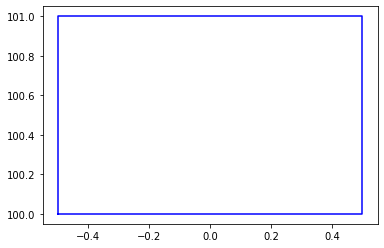

In [3]:
import matplotlib.pyplot as plt
def plot_element(x, ax=None, color="b"):
    if ax is None:
        ax = plt.axes()
    ax.plot(np.append(x[4:], x[4]),
             np.append(x[:4], x[0]), color=color)
    return ax
plot_element(r_z)
plt.show()

[ 0.5285  0.5285  0.5228  0.5228 -0.004   0.004   0.004  -0.004 ]


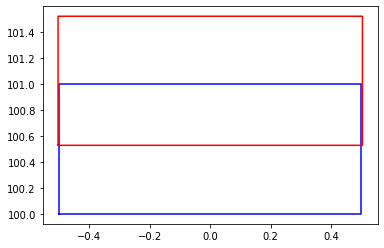

In [4]:
F_r = 5000
F_z = 1000*np.pi*(101**2-100**2)
F=np.array([F_r, F_r, 0, 0, -F_z, F_z, F_z, -F_z])
u = np.linalg.pinv(K)@F
print(u)
ax = plot_element(r_z)
plot_element(r_z + u, ax, "r")
plt.show()

In [5]:
print(D(190000, 0.3)@B_matrix(100,-0.5,r_z)@u)
print(D(190000, 0.3)@B_matrix(100,0.5,r_z)@u)
print(D(190000, 0.3)@B_matrix(101,-0.5,r_z)@u)
print(D(190000, 0.3)@B_matrix(101,0.5,r_z)@u)

[-5.1066e-01  1.6068e+03  2.0091e+03  8.8505e-01]
[-5.1066e-01  1.6068e+03  2.0091e+03 -8.8505e-01]
[-1.5101e+01  1.5763e+03  1.9910e+03  8.8505e-01]
[-1.5101e+01  1.5763e+03  1.9910e+03 -8.8505e-01]


# Assembly of stiffness matrix
Now let's try assembling the stiffness matrix so we can create a two-element model:

In [6]:
def assemble_stiffness_matrix(coords, elements, elmat):
    dof = len(coords)*2
    K = np.zeros([dof, dof])
    for elno, nodenos in enumerate(elements):
        r_z = get_element_r_z(elno, elements, coords)
        E, nu = elmat[elno]
        K_el = stiffness_matrix(r_z, E, nu)
        for i, j in enumerate(nodenos):
            for k, l in enumerate(nodenos):
                K[j, l] += K_el[i, k]
                K[j, l+len(coords)] += K_el[i, k+4]
                K[j+len(coords), l] += K_el[i+4, k]
                K[j+len(coords), l+len(coords)] += K_el[i+4, k+4]
    return K

In [7]:
coords = [[10,-0.5], [10,0.5], [11,-0.5], [11,0.5], [12,-0.5], [12,0.5]]
elements = [[0, 1, 3, 2], [2, 3, 5, 4]]
elmat = [[190000, 0.3], [190000, 0.3]]
K = assemble_stiffness_matrix(coords, elements, elmat)

[-0.0413 -0.0413 -0.049  -0.049  -0.0566 -0.0566 -0.0112  0.0112 -0.0112  0.0112 -0.0112  0.0112]


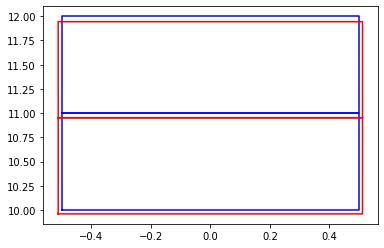

In [8]:
F_r = 1000
F_z = 1000*np.pi*(12**2-10**2)/10
F = np.array([F_r, F_r, F_r, F_r, F_r, F_r, -10*F_z, 10*F_z, -2*11*F_z, 2*11*F_z, -12*F_z, 12*F_z])
u = np.linalg.pinv(K)@F
print(u)
ax = None
for elno, nodenos in enumerate(elements):
    r_z = get_element_r_z(elno, elements, coords)
    u_el = np.append(u[nodenos], u[[i+len(coords) for i in nodenos]])
    ax = plot_element(r_z, ax)
    ax = plot_element(r_z + u_el, ax, "r")
plt.show()

In [9]:
for elno, nodenos in enumerate(elements):
    r_z = get_element_r_z(elno, elements, coords)
    u_el = np.append(u[nodenos], u[[i+len(coords) for i in nodenos]])
    for nodeno in nodenos:
        print(D(190000, 0.3)@B_matrix(coords[nodeno][0],coords[nodeno][0],r_z)@u_el)

[   8.8938  539.8846 4403.6508   69.5387]
[   8.8938  539.8846 4403.6508   69.5387]
[ -16.8794  465.8396 4391.7854   76.4925]
[ -16.8794  465.8396 4391.7854   76.4925]
[  20.2002  481.7308 4407.6766   58.5197]
[  20.2002  481.7308 4407.6766   58.5197]
[-6.6553e-01  4.2240e+02  4.3975e+03  6.3840e+01]
[-6.6553e-01  4.2240e+02  4.3975e+03  6.3840e+01]


# Six element model
And now, a six element model....

In [10]:
coords = [
    [10, -0.5],
    [10, 0],
    [10, 1],
    [11, -0.5],
    [11, 0],
    [11, 0.5],
    [12, -0.5],
    [12, 0],
    [12, 0.5],
    [13, -1],
    [13, 0],
    [13, 0.5]
] 
elements = [
    [0, 1, 4, 3],
    [1, 2, 5, 4],
    [3, 4, 7, 6],
    [4, 5, 8, 7],
    [6, 7, 10, 9],
    [7, 8, 11, 10]]
elmat = [[190000, 0.3], [190000, 0.3], [190000, 0.3], [190000, 0.3], [190000, 0.3], [190000, 0.3]]
K = assemble_stiffness_matrix(coords, elements, elmat)

This time, we want to calculate the radial nodal forces based on c.f. load. The element body force is:

\begin{equation*} f_b = 2 \pi \bar{r} A R_b\end{equation*}

Where $R_b = \omega^2 \rho \bar{r}$.

Average radius $\bar{r}\$ is:

\begin{equation*} \bar{r} = \int\limits_A r dA \end{equation*}

For a triangle, this is the average of the nodal radii; a quadrilateral, it is the area-weighted average of the two triangles:

$$\bar{r} = \frac{\frac{1}{3}A_{123}(r_1 + r_2 + r_3) + \frac{1}{3}A_{234}(r_2 + r_3 + r_4)}{A}$$

$$A_{123} = \frac{1}{2} \vert r_1 z_2 + r_2 z_3 + r_3 z_1 − r_1 z_3 − r_3 z_2 − r_2 z_1 \vert$$

$$A_{234} = \frac{1}{2} \vert r_2 z_3 + r_3 z_4 + r_4 z_2 − r_2 z_4 − r_4 z_3 − r_3 z_2 \vert$$

[ 0.3131  0.2939  0.2548  0.3049  0.286   0.2669  0.2979  0.2793  0.2606  0.3093  0.273   0.2546 -0.0521 -0.0568
 -0.0654 -0.0143 -0.0185 -0.0223  0.0228  0.0191  0.0157  0.0628  0.056   0.053 ]


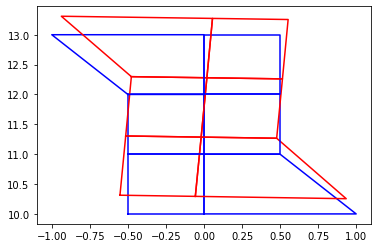

In [11]:
rho = 8908*10**-9
omega = 2000
r_, A, F_r, F_z = [], [], [0]*len(coords), [0]*len(coords)

def calc_element_r_(r_z):
    A_123 = 0.5*abs(r_z[0]*r_z[5] + r_z[1]*r_z[6] + r_z[2]*r_z[4] - r_z[0]*r_z[6] - r_z[2]*r_z[5]  - r_z[1]*r_z[4])
    A_234 = 0.5*abs(r_z[1]*r_z[6] + r_z[2]*r_z[7] + r_z[3]*r_z[5] - r_z[1]*r_z[7] - r_z[3]*r_z[6]  - r_z[2]*r_z[5])
    r_123 = (r_z[0] + r_z[1] + r_z[2])/3
    r_234 = (r_z[1] + r_z[2] + r_z[3])/3
    A = A_123 + A_234
    r_ = (r_123 * A_123 + r_234 * A_234) / A
    return r_, A

for elno, nodenos in enumerate(elements):
    r_z = get_element_r_z(elno, elements, coords)
    A.append(calc_element_area(r_z))
    r_, A_ = calc_element_r_(r_z)
    fb = 2*np.pi*r_**2*A_*omega**2*rho
    for i in nodenos:
        F_r[i] += fb/4

F = np.array(F_r + F_z)
u = np.linalg.pinv(K)@F
print(u)
ax = None
for elno, nodenos in enumerate(elements):
    r_z = get_element_r_z(elno, elements, coords)
    u_el = np.append(u[nodenos], u[[i+len(coords) for i in nodenos]])
    ax = plot_element(r_z, ax)
    ax = plot_element(r_z + u_el, ax, "r")
plt.show()

In [12]:
for elno, nodenos in enumerate(elements):
    r_z = get_element_r_z(elno, elements, coords)
    u_el = np.append(u[nodenos], u[[i+len(coords) for i in nodenos]])
    for nodeno in nodenos:
        print(B_matrix(coords[nodeno][0],coords[nodeno][0],r_z)@u_el)

[-0.0009 -0.009  -0.0095  0.0119]
[-0.0009 -0.009  -0.0095  0.0119]
[-0.0002 -0.0117 -0.0083  0.0138]
[-0.0002 -0.0117 -0.0083  0.0138]
[ 0.0013 -0.0097 -0.0085  0.0075]
[ 0.0013 -0.0097 -0.0085  0.0075]
[ 0.0022 -0.0122 -0.0077  0.0093]
[ 0.0022 -0.0122 -0.0077  0.0093]
[-0.0002 -0.0117 -0.0083  0.0097]
[-0.0002 -0.0117 -0.0083  0.0097]
[ 0.0004 -0.0138 -0.0074  0.0112]
[ 0.0004 -0.0138 -0.0074  0.0112]
[ 0.002  -0.0122 -0.0077  0.008 ]
[ 0.002  -0.0122 -0.0077  0.008 ]
[ 0.0028 -0.0141 -0.0069  0.0096]
[ 0.0028 -0.0141 -0.0069  0.0096]
[ 0.0034 -0.0138 -0.0074  0.008 ]
[ 0.0034 -0.0138 -0.0074  0.008 ]
[ 0.0042 -0.0153 -0.0068  0.0095]
[ 0.0042 -0.0153 -0.0068  0.0095]
[ 0.0022 -0.0141 -0.0069  0.0094]
[ 0.0022 -0.0141 -0.0069  0.0094]
[ 0.0029 -0.0157 -0.0061  0.011 ]
[ 0.0029 -0.0157 -0.0061  0.011 ]


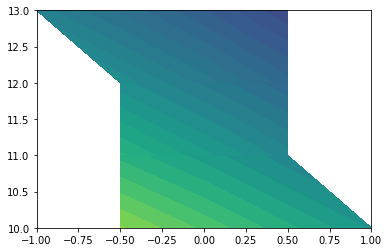

In [13]:
ax = plt.axes()
vmin, vmax = 9999, -9999
for elno, nodenos in enumerate(elements):
    u_el = np.append(u[nodenos], u[[i+len(coords) for i in nodenos]])
    for nodeno in nodenos:
        sigma = (B_matrix(coords[nodeno][0],coords[nodeno][1],r_z)@u_el)[1]
        vmin = sigma if sigma < vmin else vmin
        vmax = sigma if sigma > vmax else vmax

for elno, nodenos in enumerate(elements):
    r_z = get_element_r_z(elno, elements, coords)
    u_el = np.append(u[nodenos], u[[i+len(coords) for i in nodenos]])
    str_hp = []
    for nodeno in nodenos:
        str_hp.append((B_matrix(coords[nodeno][0],coords[nodeno][1],r_z)@u_el)[1])
    ax.contourf([[r_z[4], r_z[5]],[r_z[7], r_z[6]]],[[r_z[0], r_z[1]],[r_z[3], r_z[2]]],[[str_hp[0],str_hp[1]],[str_hp[3],str_hp[2]]], vmin=vmin, vmax=vmax)

#ax.colorbar()
plt.show()

In [14]:
coords = [
    [5, -6],
    [5, -4.5],
    [5, -3],
    [5, -1.5],
    [5, 0],
    [5, 1.5],
    [5, 3],
    [5, 4.5],
    [5, 6],
    [8, -4],
    [8, -3],
    [8, -2],
    [8, -1],
    [8, 0],
    [8, 1],
    [8, 2],
    [8, 3],
    [8, 4],
    [10, -4*3/4],
    [10, -3*3/4],
    [10, -2*3/4],
    [10, -1*3/4],
    [10, 0*3/4],
    [10, 1*3/4],
    [10, 2*3/4],
    [10, 3*3/4],
    [10, 4*3/4],
    [12, -4*2/3],
    [12, -3*2/3],
    [12, -2*2/3],
    [12, -1*2/3],
    [12, 0*2/3],
    [12, 1*2/3],
    [12, 2*2/3],
    [12, 3*2/3],
    [12, 4*2/3],
    [14, -4*3/5],
    [14, -3*3/5],
    [14, -2*3/5],
    [14, -1*3/5],
    [14, 0*3/5],
    [14, 1*3/5],
    [14, 2*3/5],
    [14, 3*3/5],
    [14, 4*3/5],
    [20, -4*3/5],
    [20, -3*3/5],
    [20, -2*3/5],
    [20, -1*3/5],
    [20, 0*3/5],
    [20, 1*3/5],
    [20, 2*3/5],
    [20, 3*3/5],
    [20, 4*3/5],
    [26, -4*3/5],
    [26, -3*3/5],
    [26, -2*3/5],
    [26, -1*3/5],
    [26, 0*3/5],
    [26, 1*3/5],
    [26, 2*3/5],
    [26, 3*3/5],
    [26, 4*3/5],
    [27, -4*4/5],
    [27, -3*4/5],
    [27, -2*4/5],
    [27, -1*4/5],
    [27, 0*2/3],
    [27, 1*2/3],
    [27, 2*2/3],
    [27, 3*2/3],
    [27, 4*2/3],
    [28, -4*9/8],
    [28, -3*9/8],
    [28, -2*9/8],
    [28, -1*9/8],
    [28, 0*3/4],
    [28, 1*3/4],
    [28, 2*3/4],
    [28, 3*3/4],
    [28, 4*3/4],
    [29, -4*1.5],
    [29, -3*1.5],
    [29, -2*1.5],
    [29, -1*1.5],
    [29, 0],
    [29, 1],
    [29, 2],
    [29, 3],
    [29, 4],
    [30, -4*1.5],
    [30, -3*1.5],
    [30, -2*1.5],
    [30, -1*1.5],
    [30, 0],
    [30, 1],
    [30, 2],
    [30, 3],
    [30, 4],
] 
elements = []
elmat =[]
for i in range(10):
    for j in range(8):
        elements.append([
            9 * i + j,
            9 * i + j + 1,
            9 * i + j + 10,
            9 * i + j + 9
        ])
        elmat.append([190000, 0.3])
K = assemble_stiffness_matrix(coords, elements, elmat)

[ 0.1029  0.125   0.1401  0.1461  0.1428  0.1312  0.1127  0.0885  0.06    0.1299  0.1411  0.1466  0.1468  0.1429
  0.1356  0.1252  0.1118  0.0952  0.155   0.1589  0.1592  0.1568  0.1524  0.1464  0.1388  0.1299  0.1194  0.1825
  0.1808  0.1775  0.1729  0.1672  0.1607  0.1535  0.1455  0.137   0.211   0.2046  0.1982  0.1918  0.185   0.1779
  0.1704  0.1625  0.1541  0.2733  0.2638  0.2543  0.2447  0.235   0.2253  0.2154  0.2054  0.1953  0.3135  0.3002
  0.2876  0.2755  0.2636  0.252   0.2405  0.2291  0.2175  0.3378  0.317   0.2982  0.2811  0.265   0.2521  0.2393
  0.2265  0.2136  0.3703  0.341   0.3134  0.2881  0.2651  0.2505  0.2361  0.222   0.208   0.4058  0.3671  0.3298
  0.2954  0.2643  0.2449  0.2259  0.2073  0.1888  0.4019  0.3641  0.3277  0.2938  0.263   0.2435  0.2246  0.2059
  0.1873 -0.0763 -0.0908 -0.1123 -0.1374 -0.1628 -0.1864 -0.2067 -0.2221 -0.2314 -0.1139 -0.1212 -0.1302 -0.1398
 -0.1495 -0.1586 -0.1669 -0.1738 -0.1791 -0.1119 -0.1189 -0.1259 -0.1327 -0.1393 -0.1455 -0.1513

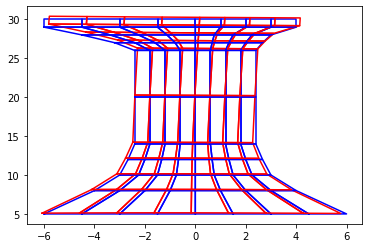

In [15]:
rho = 8908*10**-9
omega = 1000
r_, A, F_r, F_z = [], [], [0]*len(coords), [0]*len(coords)
for elno, nodenos in enumerate(elements):
    r_z = get_element_r_z(elno, elements, coords)
    A.append(calc_element_area(r_z))
    r_, A_ = calc_element_r_(r_z)
    fb = 2*np.pi*r_**2*A_*omega**2*rho
    for i in nodenos:
        F_r[i] += fb/4

F = np.array(F_r + F_z)
u = np.linalg.pinv(K)@F
print(u)
ax = None
for elno, nodenos in enumerate(elements):
    r_z = get_element_r_z(elno, elements, coords)
    u_el = np.append(u[nodenos], u[[i+len(coords) for i in nodenos]])
    ax = plot_element(r_z, ax)
    ax = plot_element(r_z + u_el, ax, "r")
plt.show()

-0.003909322377170121 0.015691269033828087


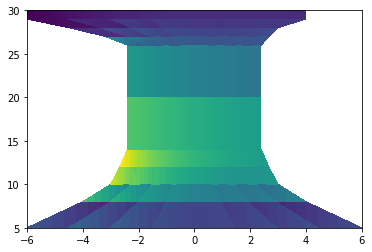

In [16]:
ax = plt.axes()
vmin, vmax = 9999, -9999
for elno, nodenos in enumerate(elements):
    r_z = get_element_r_z(elno, elements, coords)
    u_el = np.append(u[nodenos], u[[i+len(coords) for i in nodenos]])
    for nodeno in nodenos:
        sigma = (B_matrix(coords[nodeno][0],coords[nodeno][1],r_z)@u_el)[0]
        vmin = sigma if sigma < vmin else vmin
        vmax = sigma if sigma > vmax else vmax
print(vmin, vmax)
for elno, nodenos in enumerate(elements):
    r_z = get_element_r_z(elno, elements, coords)
    u_el = np.append(u[nodenos], u[[i+len(coords) for i in nodenos]])
    str_hp = []
    for nodeno in nodenos:
        str_hp.append((B_matrix(coords[nodeno][0],coords[nodeno][1],r_z)@u_el)[0])
    ax.contourf([[r_z[4], r_z[5]],[r_z[7], r_z[6]]],[[r_z[0], r_z[1]],[r_z[3], r_z[2]]],[[str_hp[0],str_hp[1]],[str_hp[3],str_hp[2]]], vmin=vmin, vmax=vmax)

#ax.colorbar()
plt.show()